## EPL


In [1]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import os
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import CategoricalDtype
import ipywidgets as widgets

In [2]:
df = pd.read_excel('Desktop/epl-2020-GMTStandardTime.xlsx')

In [3]:
df.dtypes

Match Number      int64
Round Number      int64
Date            float64
Location         object
Home Team        object
Away Team        object
Result           object
dtype: object

In [4]:
df.columns

Index(['Match Number', 'Round Number', 'Date', 'Location', 'Home Team',
       'Away Team', 'Result'],
      dtype='object')

In [5]:
df.sort_values(by = 'Round Number').head(10).style.highlight_between(axis=1, subset=['Date'], props='font-weight:bold;color:#e83e8c')

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
0,4,1,44086.520833,Craven Cottage,Fulham,Arsenal,0 - 3
1,3,1,44086.625000,Selhurst Park,Crystal Palace,Southampton,1 - 0
2,5,1,44086.729167,Anfield,Liverpool,Leeds,4 - 3
3,8,1,44086.833333,London Stadium,West Ham,Newcastle,0 - 2
4,7,1,44087.583333,The Hawthorns,West Brom,Leicester,0 - 3
5,6,1,44087.687500,Tottenham Hotspur Stadium,Spurs,Everton,0 - 1
6,10,1,44088.750000,Bramall Lane,Sheffield Utd,Wolves,0 - 2
7,9,1,44088.843750,Amex Stadium,Brighton,Chelsea,1 - 3
17,20,2,44095.843750,Molineux Stadium,Wolves,Man City,1 - 3
16,12,2,44095.750000,Villa Park,Aston Villa,Sheffield Utd,1 - 0


In [6]:
# dropping date column as doesn't make sense
df.drop(columns='Date',inplace= True)

In [7]:
df

,Match Number,Round Number,Location,Home Team,Away Team,Result
0,4,1,Craven Cottage,Fulham,Arsenal,0 - 3
1,3,1,Selhurst Park,Crystal Palace,Southampton,1 - 0
2,5,1,Anfield,Liverpool,Leeds,4 - 3
3,8,1,London Stadium,West Ham,Newcastle,0 - 2
4,7,1,The Hawthorns,West Brom,Leicester,0 - 3
...,...,...,...,...,...,...
375,376,38,Anfield,Liverpool,Crystal Palace,2 - 0
376,377,38,Etihad Stadium,Man City,Everton,5 - 0
377,378,38,Bramall Lane,Sheffield Utd,Burnley,1 - 0
378,379,38,London Stadium,West Ham,Southampton,3 - 0


In [8]:
df.set_index('Match Number')

,Round Number,Location,Home Team,Away Team,Result
Match Number,,,,,
4,1,Craven Cottage,Fulham,Arsenal,0 - 3
3,1,Selhurst Park,Crystal Palace,Southampton,1 - 0
5,1,Anfield,Liverpool,Leeds,4 - 3
8,1,London Stadium,West Ham,Newcastle,0 - 2
7,1,The Hawthorns,West Brom,Leicester,0 - 3
...,...,...,...,...,...
376,38,Anfield,Liverpool,Crystal Palace,2 - 0
377,38,Etihad Stadium,Man City,Everton,5 - 0
378,38,Bramall Lane,Sheffield Utd,Burnley,1 - 0


In [9]:
df2 = pd.read_excel('Desktop/soccer-standings.xlsx', header=1)

In [10]:
print(df2.shape);df2.columns

(20, 28)


Index(['Team', 'Rank', 'P', 'M', 'W', 'D', 'L', 'G', 'GA', 'GD', 'Rank.1',
       'P.1', 'M.1', 'W.1', 'D.1', 'L.1', 'G.1', 'GA.1', 'GD.1', 'Rank.2',
       'P.2', 'M.2', 'W.2', 'D.2', 'L.2', 'G.2', 'GA.2', 'GD.2'],
      dtype='object')

In [11]:
col1= [df2.columns[x][:-2] + '_home' for x in range(10,19)]

In [12]:
col1

['Rank_home',
 'P_home',
 'M_home',
 'W_home',
 'D_home',
 'L_home',
 'G_home',
 'GA_home',
 'GD_home']

In [13]:
col2 = [df2.columns[x][:-2] + '_away' for x in range(19,28)]

In [14]:
col3 = list(df2.columns[:10])
col= col3 + col1 + col2
col
df2.columns = col;df2.columns

Index(['Team', 'Rank', 'P', 'M', 'W', 'D', 'L', 'G', 'GA', 'GD', 'Rank_home',
       'P_home', 'M_home', 'W_home', 'D_home', 'L_home', 'G_home', 'GA_home',
       'GD_home', 'Rank_away', 'P_away', 'M_away', 'W_away', 'D_away',
       'L_away', 'G_away', 'GA_away', 'GD_away'],
      dtype='object')

In [15]:
df2.style

,Team,Rank,P,M,W,D,L,G,GA,GD,Rank_home,P_home,M_home,W_home,D_home,L_home,G_home,GA_home,GD_home,Rank_away,P_away,M_away,W_away,D_away,L_away,G_away,GA_away,GD_away
0,Manchester City,1,86,38,27,5,6,83,32,51,1,41,19,13,2,4,43,17,26,1,45,19,14,3,2,40,15,25
1,Manchester United,2,74,38,21,11,6,73,44,29,6,31,19,9,4,6,38,28,10,2,43,19,12,7,0,35,16,19
2,Liverpool,3,69,38,20,9,9,68,42,26,5,33,19,10,3,6,29,20,9,5,36,19,10,6,3,39,22,17
3,Chelsea,4,67,38,19,10,9,58,36,22,4,33,19,9,6,4,31,18,13,6,34,19,10,4,5,27,18,9
4,Leicester City,5,66,38,20,6,12,68,50,18,8,28,19,9,1,9,34,30,4,3,38,19,11,5,3,34,20,14
5,West Ham United,6,65,38,19,8,11,62,47,15,2,34,19,10,4,5,32,22,10,8,31,19,9,4,6,30,25,5
6,Tottenham Hotspur,7,62,38,18,8,12,68,45,23,3,33,19,10,3,6,35,20,15,11,29,19,8,5,6,33,25,8
7,Arsenal,8,61,38,18,7,13,55,39,16,9,28,19,8,4,7,24,21,3,7,33,19,10,3,6,31,18,13
8,Leeds United,9,59,38,18,5,15,62,54,8,7,29,19,8,5,6,28,21,7,10,30,19,10,0,9,34,33,1
9,Everton,10,59,38,17,8,13,47,48,-1,15,22,19,6,4,9,24,28,-4,4,37,19,11,4,4,23,20,3


In [17]:
df3 = pd.read_csv('Downloads/EPLStandings2010-2021.csv')

## *_data df3 has data of 11 seasons_*

In [18]:
df3.dtypes

Season                         object
Pos                             int64
Team                           object
Pld                             int64
W                               int64
D                               int64
L                               int64
GF                              int64
GA                              int64
GD                              int64
Pts                             int64
Qualification or relegation    object
dtype: object

In [19]:
blob = TextBlob(df3['Qualification or relegation'][0])

In [20]:
blob

TextBlob("Qualification for the Champions League group stage")

In [21]:
df3.tail()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
215,2020-21,16,Brighton & Hove Albion,38,9,14,15,40,46,-6,41,Not Applicable
216,2020-21,17,Burnley,38,10,9,19,33,55,-22,39,Not Applicable
217,2020-21,18,Fulham,38,5,13,20,27,53,-26,28,Relegation to the EFL Championship
218,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship
219,2020-21,20,Sheffield United,38,7,2,29,20,63,-43,23,Relegation to the EFL Championship


In [22]:
cl = [TextBlob(df3['Qualification or relegation'][x]) for x in range(len(df3))]

In [23]:
len(cl)

220

In [24]:
# making into atomic columns. no use for blob 
c = df3['Qualification or relegation'].str.contains('Champions League') # bool
pd.Series(c)
df3["ucl"]= c
d = df3['Qualification or relegation'].str.contains('Relegation') # bool
pd.Series(d)
df3["Relegation"]= d
e = df3['Qualification or relegation'].str.contains('Europa') # bool
pd.Series(e)
df3["Europa"]= e
df3.drop(axis=1, columns= 'Qualification or relegation', inplace = True)

In [25]:
df3.iloc[22:26,:]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,ucl,Relegation,Europa
22,2011-12,3,Arsenal,38,21,7,10,74,49,25,70,True,False,False
23,2011-12,4,Tottenham Hotspur,38,20,9,9,66,41,25,69,False,False,True
24,2011-12,5,Newcastle United,38,19,8,11,56,51,5,65,False,False,True
25,2011-12,6,Chelsea,38,18,10,10,65,46,19,64,True,False,False


In [26]:
df3.columns

Index(['Season', 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'ucl', 'Relegation', 'Europa'],
      dtype='object')

In [27]:
print(df.columns)
print(df2.columns)
print(df3.columns)

Index(['Match Number', 'Round Number', 'Location', 'Home Team', 'Away Team',
       'Result'],
      dtype='object')
Index(['Team', 'Rank', 'P', 'M', 'W', 'D', 'L', 'G', 'GA', 'GD', 'Rank_home',
       'P_home', 'M_home', 'W_home', 'D_home', 'L_home', 'G_home', 'GA_home',
       'GD_home', 'Rank_away', 'P_away', 'M_away', 'W_away', 'D_away',
       'L_away', 'G_away', 'GA_away', 'GD_away'],
      dtype='object')
Index(['Season', 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'ucl', 'Relegation', 'Europa'],
      dtype='object')


In [28]:
df3.dtypes

Season        object
Pos            int64
Team          object
Pld            int64
W              int64
D              int64
L              int64
GF             int64
GA             int64
GD             int64
Pts            int64
ucl             bool
Relegation      bool
Europa          bool
dtype: object

In [29]:
print(df3.head(5));df3.tail

    Season  Pos               Team  Pld   W   D  L  GF  GA  GD  Pts    ucl  \
0  2010-11    1  Manchester United   38  23  11  4  78  37  41   80   True   
1  2010-11    2            Chelsea   38  21   8  9  69  33  36   71   True   
2  2010-11    3    Manchester City   38  21   8  9  60  33  27   71   True   
3  2010-11    4            Arsenal   38  19  11  8  72  43  29   68   True   
4  2010-11    5  Tottenham Hotspur   38  16  14  8  55  46   9   62  False   

   Relegation  Europa  
0       False   False  
1       False   False  
2       False   False  
3       False   False  
4       False    True  


<bound method NDFrame.tail of       Season  Pos                    Team  Pld   W   D   L  GF  GA  GD  Pts  \
0    2010-11    1       Manchester United   38  23  11   4  78  37  41   80   
1    2010-11    2                 Chelsea   38  21   8   9  69  33  36   71   
2    2010-11    3         Manchester City   38  21   8   9  60  33  27   71   
3    2010-11    4                 Arsenal   38  19  11   8  72  43  29   68   
4    2010-11    5       Tottenham Hotspur   38  16  14   8  55  46   9   62   
..       ...  ...                     ...  ...  ..  ..  ..  ..  ..  ..  ...   
215  2020-21   16  Brighton & Hove Albion   38   9  14  15  40  46  -6   41   
216  2020-21   17                 Burnley   38  10   9  19  33  55 -22   39   
217  2020-21   18                  Fulham   38   5  13  20  27  53 -26   28   
218  2020-21   19    West Bromwich Albion   38   5  11  22  35  76 -41   26   
219  2020-21   20        Sheffield United   38   7   2  29  20  63 -43   23   

       ucl  Relegatio

In [30]:
df3.Season = pd.Categorical(df3.Season)
df3.Team = pd.Categorical(df3.Team)
df3.ucl = pd.Categorical(df3.ucl)
df3.Relegation =pd.Categorical(df3.Relegation)
df3.Europa =pd.Categorical(df3.Europa)

In [31]:
df3.dtypes

Season        category
Pos              int64
Team          category
Pld              int64
W                int64
D                int64
L                int64
GF               int64
GA               int64
GD               int64
Pts              int64
ucl           category
Relegation    category
Europa        category
dtype: object

#### Fitting *_Naive Bayes_* for clubs to see if where than stand in terms of ucl, relagation, europa

In [32]:
from sklearn.naive_bayes import CategoricalNB

In [33]:
from sklearn.model_selection import train_test_split

In [67]:
clf = CategoricalNB(min_categories=37)

In [48]:
x = df3.iloc[:,2]
y = df3[['ucl','Europa','Relegation']]


In [49]:
x = pd.get_dummies(x)

In [50]:
x.head()

,Arsenal,Aston Villa,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Bournemouth,Brighton & Hove Albion,Burnley,Cardiff City,...,Southampton,Stoke City,Sunderland,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wolverhampton Wanderers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
y = pd.get_dummies(y, drop_first=True)

In [52]:
y.head()

,ucl_True,Europa_True,Relegation_True
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [68]:
clf.fit(x_train,y_train.iloc[:,0])

CategoricalNB(min_categories=37)

In [69]:
ypred = clf.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [74]:
c = confusion_matrix(ypred, y_test.iloc[:,0]);print("The confusion matrix:\n", c)

The confusion matrix:
 [[43 12]
 [ 0  0]]


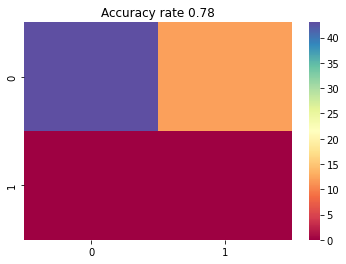

In [75]:
sns.heatmap(c, cmap="Spectral")
plt.title(f"Accuracy rate {(c[0,0]+c[1,1])/(np.sum(c)):3.2}")
plt.show()